In [1]:
class NejiData:
    def __init__(self) -> None:
        

SyntaxError: incomplete input (377684657.py, line 3)

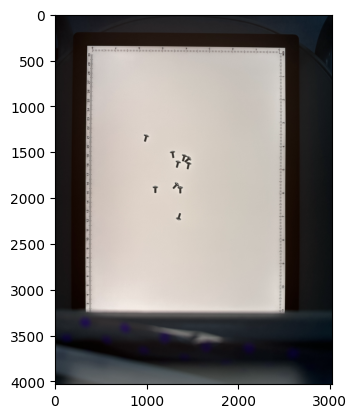

In [ ]:
! pip install opencv-python

import matplotlib.pyplot as plt
import cv2

im = cv2.imread("../../data/imgs/02/10_1.JPG")
plt.imshow(im)
plt.show()

In [ ]:
timg=im[427:3220,392:2422]
#切り抜きたい部分の座標を入力

cv2.imwrite("timg.jpg",timg)
cv2.waitKey(0)

In [ ]:
from PIL import Image
import os

def process_images(input_folder, output_folder, crop_coordinates):
    # 入力フォルダー内の画像ファイルのリストを取得
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # 出力フォルダーが存在しない場合は作成
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 画像ごとに処理
    for image_file in image_files:
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, image_file.replace('.', '_out.'))  # 出力ファイル名を変更

        # 画像を開いて座標を指定して切り抜き、新しい画像を作成
        original_image = Image.open(input_path)
        cropped_image = original_image.crop(crop_coordinates)

        # 新しい画像を保存
        cropped_image.save(output_path)

# 例: 座標を指定して画像を切り抜き、新しい画像を作成
input_folder = '../../data/imgs/02'
output_folder = 'output'
crop_coordinates = (450, 600, 3200, 2600)
process_images(input_folder, output_folder, crop_coordinates)


In [ ]:
# 画像内のネジをカウントする
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_neji(image,MedianList):
    # 画像読込
    src = cv2.imread("../../data/imgs/02/10_1(out).JPG")

    # 2値化
    ret, dst = cv2.threshold(src,115,255, cv2.THRESH_BINARY_INV)

    # 黒と白の比から、ネジ一本当たりの比の平均を計算する。
    black_pixels = np.sum(image == 0)  # 黒いピクセルの数
    white_pixels = np.sum(image == 255)  # 白いピクセルの数
        
    if white_pixels == 0:
        ratio = 0
        
    ratio = black_pixels / white_pixels
    print(ratio)
    MedianList.append(ratio)

MedianList = []

image_files = [f for f in os.listdir("./output") if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

for image_file in image_files:
    input_path = os.path.join(input_folder, image_file)
    count_neji(input_path,MedianList)

# リストの平均
median = sum(MedianList) / len(MedianList)
print(MedianList)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


[ WARN:0@0.208] global loadsave.cpp:248 findDecoder imread_('../../data/imgs/02/10_1(out).JPG'): can't open/read file: check file path/integrity
/var/folders/th/yh_31zfx5q92yj6dq7pn554m0000gn/T/ipykernel_10704/2995865627.py:20: RuntimeWarning: invalid value encountered in scalar divide
  ratio = black_pixels / white_pixels
[ WARN:0@0.208] global loadsave.cpp:248 findDecoder imread_('../../data/imgs/02/10_1(out).JPG'): can't open/read file: check file path/integrity
[ WARN:0@0.208] global loadsave.cpp:248 findDecoder imread_('../../data/imgs/02/10_1(out).JPG'): can't open/read file: check file path/integrity
[ WARN:0@0.208] global loadsave.cpp:248 findDecoder imread_('../../data/imgs/02/10_1(out).JPG'): can't open/read file: check file path/integrity
[ WARN:0@0.208] global loadsave.cpp:248 findDecoder imread_('../../data/imgs/02/10_1(out).JPG'): can't open/read file: check file path/integrity
[ WARN:0@0.208] global loadsave.cpp:248 findDecoder imread_('../../data/imgs/02/10_1(out).JPG')

画像を本数ごとに処理し、各ネジの平均を出す

In [ ]:
import os
import cv2
import numpy as np

def count_neji(image, MedianList):
    # 2値化
    ret, dst = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY_INV)

    # 黒と白の比から、ネジ一本当たりの比の平均を計算する。
    black_pixels = np.sum(dst == 0)  # 黒いピクセルの数
    white_pixels = np.sum(dst == 255)  # 白いピクセルの数
    print(black_pixels)
    print(white_pixels)

    if white_pixels == 0:
        ratio = 0
    else:
        ratio = white_pixels / 5

    print(ratio)
    MedianList.append(ratio)

def process_images(folder_path, MedianList):
    # フォルダ内の画像ファイルのリストを取得
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # 画像ごとに処理
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)

        # 画像を読み込み
        src = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # 関数を呼び出し
        count_neji(src, MedianList)

def calculate_total_screws(image, average_ratio):
    # 画像内のネジの総数を計算する
    # 2値化
    ret, dst = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY_INV)

    white_pixels = np.sum(dst == 255)  # 白いピクセルの数
    screw_count = white_pixels / average_ratio
    return screw_count


# フォルダのパスと結果を保存するリストを指定
folder_path = './output/5'
MedianList = []

# 画像を処理してリストに結果を追加
process_images(folder_path, MedianList)

# リストの平均値を計算して出力
if MedianList:
    average_ratio = np.mean(MedianList)
    print(f'ネジ一本当たりの平均比率: {average_ratio}')

    # ネジ一本当たりの平均比率を使用して、画像内のネジの総数を計算
    image_path = './output/5/5_2_out.JPG'  # 画像のパスを指定
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    total_screws = calculate_total_screws(image, average_ratio)
    print(f'画像内の総ネジ数: {total_screws}')
else:
    print('処理対象の画像がありません。')


5491476
8524
1704.8
5491599
8401
1680.2
5491271
8729
1745.8
ネジ一本当たりの平均比率: 1710.2666666666667
画像内の総ネジ数: 5.103882435487643


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


### 円を探す

In [ ]:
# 画像内の円を検出する
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("./output/20/20_3_out.JPG")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=3.1, param1=100, param2=60, minRadius=0, maxRadius=100)
circles
ret, dst = cv2.threshold(img,115, 255, cv2.THRESH_BINARY_INV)

# 白い部分のピクセル数を計算
white_pixels = np.sum(dst == 255)  # 白いピクセルの数

# 円の数を出力
print(len(circles[0]))
#　円のピクセル数を計算
circle_pixels = 0
for i in range(len(circles[0])):
    r = int(circles[0][i][2])
    circle_pixels += r * r * 3.14

# 円１つのピクセル数を計算
circle_pixel = circle_pixels / len(circles[0])
print(circle_pixel)
# 




3
1995.9933333333336


In [1]:
import cv2
import numpy as np

# 画像の読み込み
image = cv2.imread('./output/20/20_2_out.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2値化
ret, dst = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)

# 黒白反転する
dst = cv2.bitwise_not(dst)

params = {'minDist': 2.3908129483548253, 'param1': 82, 'param2': 29, 'minRadius': 0, 'maxRadius': 0}

# 円の検出
circles = cv2.HoughCircles(
    dst, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
   minDist=params['minDist'],
    param1=params['param1'],
    param2=params['param2'],
    minRadius=params['minRadius'],
    maxRadius=params['maxRadius']
)

if circles is not None:
    # 検出した円の座標を整数に変換
    circles = np.uint16(np.around(circles))

    # 元画像に円を描画
    for i in circles[0, :]:
        # 円の中心を描画
        cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 3)

        # 円を描画
        cv2.circle(image, (i[0], i[1]), i[2], (0, 0, 255), 3)
    print(len(circles[0]))
    # 結果を表示
    cv2.imshow('Detected Circles', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("円が検出されませんでした。")

cv2.imshow('Detected Circles', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

Corrupt JPEG data: premature end of data segment


8


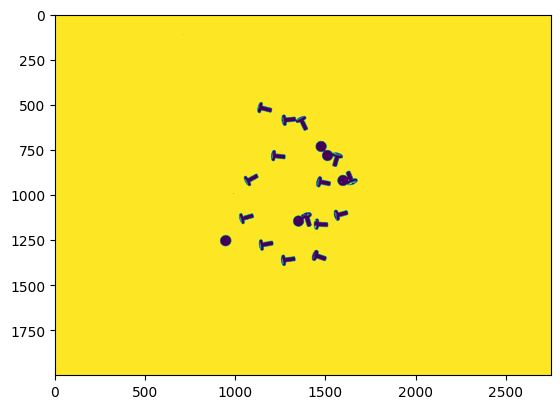

In [ ]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('./output/20/20_3_out.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2値化
ret, dst = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)

# 黒白反転する
dst = cv2.bitwise_not(dst)

plt.imshow(dst)
plt.show()

In [1]:
import cv2
import optuna

def calc(path, params):
    # 画像の読み込み
    image = cv2.imread(path)  # './output/20/20_3_out.JPG'
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 2値化
    ret, dst = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)

    # 黒白反転する
    dst = cv2.bitwise_not(dst)


    # 円の検出
    circles = cv2.HoughCircles(
        dst, 
        cv2.HOUGH_GRADIENT, 
        dp=1, 
        minDist=params['minDist'],
        param1=params['param1'],
        param2=params['param2'],
        minRadius=params['minRadius'],
        maxRadius=params['maxRadius']
    )

    if circles is not None:
        cnt = len(circles[0])
    else:
        cnt = 0

    return cnt

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# optunaのインストール
! pip install optuna

# optunaのインポート
import optuna


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


# ハイパーパラメータの最適化
def objective(trial):
   params = {
        'minDist': trial.suggest_uniform('minDist', 0.1, 5),
        'param1': trial.suggest_int('param1', 0.01, 200),
        'param2': trial.suggest_int('param2', 1, 50),
        'minRadius': 0, # trial.suggest_int('minRadius', 0, 300),
        'maxRadius': 0, # trial.suggest_int('maxRadius', 0, 500)
    }
   
   data = [
      ('./output/20/20_2_out.JPG', 10),
      ('./output/20/20_3_out.JPG', 5),
   ]

   score = 0

   for d in data:
      cnt = calc(d[0], params)
      score += abs(cnt - d[1])
   
   return score

    
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

print("-------------------------")
print('params:', study.best_params)
print(study.best_value)

[I 2024-01-05 12:06:10,530] A new study created in memory with name: no-name-133f81c7-3a7c-4610-93d6-65a82dfe2440
/var/folders/th/yh_31zfx5q92yj6dq7pn554m0000gn/T/ipykernel_15082/2973649346.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'minDist': trial.suggest_uniform('minDist', 0.1, 5),
Corrupt JPEG data: premature end of data segment
[I 2024-01-05 12:06:10,647] Trial 0 finished with value: 15.0 and parameters: {'minDist': 0.48877886690023975, 'param1': 120, 'param2': 37}. Best is trial 0 with value: 15.0.
Corrupt JPEG data: premature end of data segment
[I 2024-01-05 12:06:10,747] Trial 1 finished with value: 15.0 and parameters: {'minDist': 1.3637188280777888, 'param1': 113, 'param2': 37}. Best is trial 0 with value: 15.0.
Corrupt JPEG data: premature end of data segment
[I 2024-01-05 12:06:37,586] Trial 2 finished with value: 265140.0 

-------------------------
params: {'minDist': 2.3908129483548253, 'param1': 82, 'param2': 29}
2.0
